Nama : Diah Ayu Puspasari

NIM : 0110223052

Rombel : DE02

In [4]:
# untuk file xls
!pip install openpyxl
!pip install xlrd


In [1]:
# import library yang diperlukan
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# menghubungkan dengan google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# mengimpoert file dari google drive
path = '/content/drive/MyDrive/praktikum_dm/dataset/'

In [10]:
# Membaca dataset train dan test
train_data = pd.read_excel(path + 'kelulusan_train.xls')
test_data = pd.read_excel(path + 'kelulusan_test.xls')

In [11]:
# memanggil variable train
train_data

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,ANIK WIDAYANTI,PEREMPUAN,BEKERJA,28,BELUM MENIKAH,2.76,2.80,3.20,3.17,2.98,3.00,3.03,0.0,3.07,TERLAMBAT
1,DWI HESTYNA PRIHASTANTY,PEREMPUAN,MAHASISWA,32,BELUM MENIKAH,3.00,3.30,3.14,3.14,2.84,3.13,3.25,0.0,3.17,TERLAMBAT
2,MURYA ARIEF BASUKI,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,3.50,3.30,3.70,3.29,3.53,3.72,3.73,0.0,3.54,TERLAMBAT
3,NANIK SUSANTI,PEREMPUAN,MAHASISWA,27,BELUM MENIKAH,3.17,3.41,3.61,3.36,3.48,3.63,3.46,0.0,3.41,TERLAMBAT
4,RIFKA ISTIQFARINA,PEREMPUAN,BEKERJA,29,BELUM MENIKAH,2.90,2.89,3.30,2.85,2.98,3.00,3.08,0.0,3.09,TERLAMBAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.5,0.99,TEPAT
375,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,2.97,TEPAT
376,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.0,3.03,TEPAT
377,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.0,3.16,TEPAT


In [12]:
# memanggil variable test
test_data

,NAMA,JENIS KELAMIN,STATUS MAHASISWA,UMUR,STATUS NIKAH,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK,STATUS KELULUSAN
0,UNAMA,LAKI - LAKI,MAHASISWA,24,BELUM MENIKAH,3.17,2.70,3.23,2.41,3.00,2.47,1.75,0.00,2.75,TEPAT
1,LEYLA TRIYANA PRATIWI,PEREMPUAN,MAHASISWA,26,BELUM MENIKAH,3.60,3.50,3.42,2.85,3.31,2.95,2.18,NaN,3.39,TEPAT
2,VERIS SOFIYAN PRAYOGA,LAKI - LAKI,MAHASISWA,29,BELUM MENIKAH,2.67,2.66,2.93,3.14,2.92,2.64,2.88,0.50,2.81,TEPAT
3,ADITYA AKBAR NUGRAHA,LAKI - LAKI,MAHASISWA,27,BELUM MENIKAH,2.48,2.86,2.09,2.55,2.55,2.43,2.55,2.17,2.82,TEPAT
4,ERNA EKA RIYANTI,PEREMPUAN,MAHASISWA,25,BELUM MENIKAH,3.19,3.08,3.31,2.83,3.36,2.73,3.06,0.00,3.09,TEPAT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,ARY JULI SETIYANTO,LAKI - LAKI,MAHASISWA,23,BELUM MENIKAH,1.98,2.50,2.14,2.77,2.61,2.93,2.82,2.50,0.99,TEPAT
141,RINA ZAHROTUL UMAMI,PEREMPUAN,BEKERJA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,2.97,TEPAT
142,TULISA WAHYUHADI KRISNATAMI,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,2.74,2.75,2.55,3.00,2.98,2.80,3.14,3.00,3.03,TEPAT
143,NI'MATUL JANNAH,PEREMPUAN,MAHASISWA,23,BELUM MENIKAH,3.02,2.94,3.25,2.87,3.00,2.94,3.09,3.00,3.16,TEPAT


# Data Preparation Train Data

In [13]:
# mengecek typedata pada train
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 379 entries, 0 to 378
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              379 non-null    object 
 1   JENIS KELAMIN     379 non-null    object 
 2   STATUS MAHASISWA  379 non-null    object 
 3   UMUR              379 non-null    int64  
 4   STATUS NIKAH      379 non-null    object 
 5   IPS 1             379 non-null    float64
 6   IPS 2             379 non-null    float64
 7   IPS 3             379 non-null    float64
 8   IPS 4             379 non-null    float64
 9   IPS 5             379 non-null    float64
 10  IPS 6             379 non-null    float64
 11  IPS 7             379 non-null    float64
 12  IPS 8             372 non-null    float64
 13  IPK               376 non-null    float64
 14  STATUS KELULUSAN  379 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 44.5+ KB


In [14]:
# mencari hasil dari statistika deskriptif kolom float
train_data.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,372.000000,376.000000
mean,25.955145,2.854116,2.812322,2.900950,2.782137,2.782348,2.877256,2.531240,1.271828,2.933085
std,3.397103,0.412658,0.473725,0.589364,0.648495,0.593472,0.634412,0.757205,1.400914,0.460279
min,22.000000,0.330000,0.500000,0.160000,0.000000,0.200000,0.000000,0.000000,0.000000,0.870000
25%,24.000000,2.600000,2.550000,2.550000,2.460000,2.480000,2.590000,2.150000,0.000000,2.747500
50%,25.000000,2.860000,2.850000,2.980000,2.860000,2.850000,3.000000,2.610000,0.750000,3.010000
75%,27.000000,3.100000,3.105000,3.325000,3.200000,3.205000,3.315000,3.110000,2.750000,3.220000
max,50.000000,3.790000,3.960000,3.960000,3.910000,3.880000,4.000000,3.910000,4.000000,3.850000


In [15]:
# mengecek missing value
missing_value = train_data.isnull().sum()
missing_value

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [17]:
#meghitung ratio missing value pada kolom
rasio = missing_value.div(len(train_data))
rasio

,0
NAMA,0.000000
JENIS KELAMIN,0.000000
STATUS MAHASISWA,0.000000
UMUR,0.000000
STATUS NIKAH,0.000000
IPS 1,0.000000
IPS 2,0.000000
IPS 3,0.000000
IPS 4,0.000000
IPS 5,0.000000


In [22]:
# Isi missing values dengan median untuk IPS 8
train_data['IPS 8'].fillna(train_data['IPS 8'].median(), inplace=True)

<ipython-input-22-2a313167bc80>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['IPS 8'].fillna(train_data['IPS 8'].median(), inplace=True)


In [26]:
# Isi missing values dengan mean untuk IPK
train_data['IPK '].fillna(train_data['IPK '].mean(), inplace=True)

<ipython-input-26-b653d2b59ca5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['IPK '].fillna(train_data['IPK '].mean(), inplace=True)


In [24]:
print(train_data.columns)

Index(['NAMA', 'JENIS KELAMIN', 'STATUS MAHASISWA', 'UMUR', 'STATUS NIKAH',
       'IPS 1', 'IPS 2', 'IPS 3', 'IPS 4', 'IPS 5', 'IPS 6', 'IPS 7', 'IPS 8',
       'IPK ', 'STATUS KELULUSAN'],
      dtype='object')


In [28]:
# cek kembali missing value
train_data.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


# Data Preparation Test Data

In [29]:
# mengecek typedata pada test
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   NAMA              145 non-null    object 
 1   JENIS KELAMIN     145 non-null    object 
 2   STATUS MAHASISWA  145 non-null    object 
 3   UMUR              145 non-null    int64  
 4   STATUS NIKAH      145 non-null    object 
 5   IPS 1             145 non-null    float64
 6   IPS 2             145 non-null    float64
 7   IPS 3             145 non-null    float64
 8   IPS 4             145 non-null    float64
 9   IPS 5             145 non-null    float64
 10  IPS 6             145 non-null    float64
 11  IPS 7             145 non-null    float64
 12  IPS 8             141 non-null    float64
 13  IPK               142 non-null    float64
 14  STATUS KELULUSAN  145 non-null    object 
dtypes: float64(9), int64(1), object(5)
memory usage: 17.1+ KB


In [30]:
# mencari hasil dari statistika deskriptif kolom float
test_data.describe()

,UMUR,IPS 1,IPS 2,IPS 3,IPS 4,IPS 5,IPS 6,IPS 7,IPS 8,IPK
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,141.000000,142.000000
mean,24.475862,2.882345,2.893862,2.857310,2.990828,2.932552,2.903034,2.579379,1.932695,2.949859
std,2.395258,0.358099,0.414159,0.540566,0.513567,0.423699,0.591917,0.746163,1.509900,0.489989
min,22.000000,1.790000,0.500000,0.160000,0.320000,1.130000,0.000000,0.000000,0.000000,0.870000
25%,23.000000,2.620000,2.660000,2.480000,2.770000,2.700000,2.650000,2.250000,0.000000,2.820000
50%,24.000000,2.900000,2.910000,2.930000,3.000000,2.980000,2.940000,2.640000,2.600000,3.035000
75%,25.000000,3.100000,3.140000,3.270000,3.270000,3.240000,3.310000,3.150000,3.000000,3.237500
max,40.000000,3.710000,3.790000,3.960000,3.910000,3.780000,3.940000,3.910000,4.000000,3.850000


In [31]:
# mengecek missing value
missing_value = test_data.isnull().sum()
missing_value

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


In [33]:
#meghitung ratio missing value pada kolom
rasio = missing_value.div(len(test_data))
rasio

,0
NAMA,0.000000
JENIS KELAMIN,0.000000
STATUS MAHASISWA,0.000000
UMUR,0.000000
STATUS NIKAH,0.000000
IPS 1,0.000000
IPS 2,0.000000
IPS 3,0.000000
IPS 4,0.000000
IPS 5,0.000000


In [54]:
# Isi missing values dengan median untuk IPS 8
test_data['IPS 8'].fillna(test_data['IPS 8'].median(), inplace=True)

<ipython-input-54-90c04e05f673>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['IPS 8'].fillna(test_data['IPS 8'].median(), inplace=True)


In [55]:
# Isi missing values dengan mean untuk IPK
test_data['IPK '].fillna(test_data['IPK '].mean(), inplace=True)

<ipython-input-55-a953fadc00fd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_data['IPK '].fillna(test_data['IPK '].mean(), inplace=True)


In [56]:
# cek kembali missing value
test_data.isnull().sum()

,0
NAMA,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
UMUR,0
STATUS NIKAH,0
IPS 1,0
IPS 2,0
IPS 3,0
IPS 4,0
IPS 5,0


# Data Preprocessing

In [57]:
# Fitur (X) dan target (y) pada data train
X_train = train_data.drop(['STATUS KELULUSAN', 'NAMA', 'JENIS KELAMIN', 'STATUS NIKAH', 'STATUS MAHASISWA'], axis=1)  # Hapus kolom target dan NAMA dari fitur
y_train = train_data['STATUS KELULUSAN']              # Kolom target

# Fitur (X) dan target (y) pada data test
X_test = test_data.drop(['STATUS KELULUSAN', 'NAMA', 'JENIS KELAMIN', 'STATUS NIKAH', 'STATUS MAHASISWA'], axis=1)   # Hapus kolom target dan NAMA dari fitur
y_test = test_data['STATUS KELULUSAN']               # Kolom target

In [58]:
# Inisialisasi scaler
scaler = StandardScaler()

# Standarisasi data train
X_train = scaler.fit_transform(X_train)

# Standarisasi data test
X_test = scaler.transform(X_test)

# Train Model

In [66]:
# Inisialisasi model K-NN
knn = KNeighborsClassifier(n_neighbors=5)  # Parameter n_neighbors bisa diubah

# Latih model dengan data train
knn.fit(X_train, y_train)

# Prediksi data test
y_pred = knn.predict(X_test)

# Prediksi Data

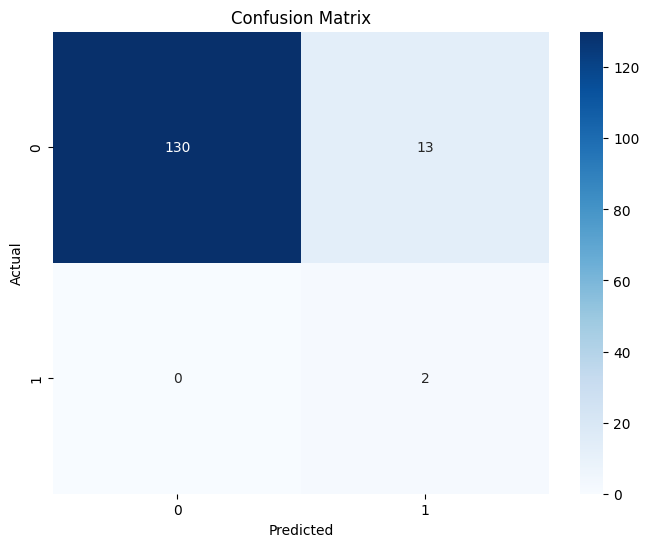

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

# melakukan prediksi
y_pred = knn.predict(X_test)

# menghitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['0','1'], yticklabels=['0', '1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Visualisasi Data

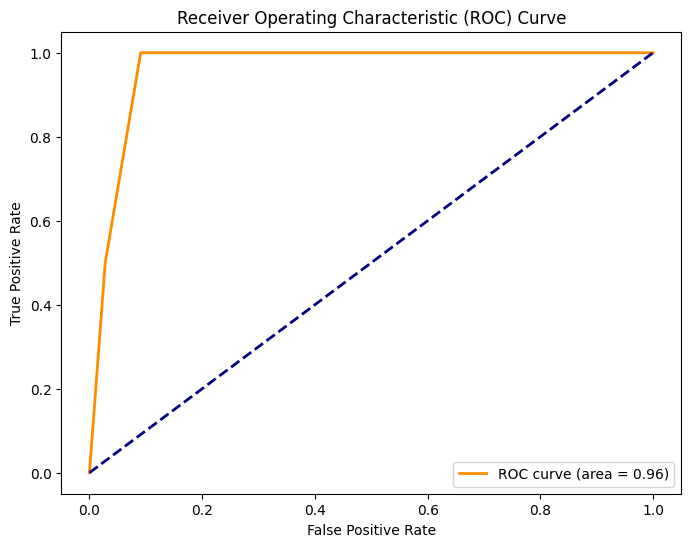

In [65]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelBinarizer # Import LabelBinarizer

# Konversi target ke format biner jika perlu
lb = LabelBinarizer()
y_test_binary = lb.fit_transform(y_test)  # Konversi ke 0/1 jika target kategori

# Hitung probabilitas prediksi
y_score = knn.predict_proba(X_test)[:, 1]

# Hitung FPR, TPR, dan AUC
fpr, tpr, thresholds = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Evaluasi Model

In [67]:
# Evaluasi hasil prediksi
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9103448275862069
Classification Report:
               precision    recall  f1-score   support

       TEPAT       1.00      0.91      0.95       143
   TERLAMBAT       0.13      1.00      0.24         2

    accuracy                           0.91       145
   macro avg       0.57      0.95      0.59       145
weighted avg       0.99      0.91      0.94       145



# Kesimpulan Hasil Analisis

Kesimpulan

1.   Model yang digunakan memiliki accuracy sebesar 91%, yang menunjukkan bahwa sebagian besar prediksi model cukup akurat. Namun, hal ini tidak sepenuhnya mencerminkan kinerja model, terutama ketika ada ketidakseimbangan dalam data.
2.   Pada kelas "TEPAT", model memiliki precision yang sangat tinggi (1.00) dan recall yang baik (0.91), yang berarti model dapat dengan sangat baik mengidentifikasi kasus "TEPAT" dan memiliki sedikit kesalahan dalam prediksi kelas ini.
3. Pada kelas "TERLAMBAT", meskipun recall sangat tinggi (1.00), precision sangat rendah (0.13). Ini menunjukkan bahwa meskipun model sering berhasil mendeteksi kelas ini, banyak prediksi "TERLAMBAT" yang salah.
4. F1-Score untuk kelas "TEPAT" sangat baik (0.95), mencerminkan keseimbangan antara precision dan recall. Namun, untuk kelas "TERLAMBAT", F1-Score rendah (0.24), karena meskipun recall tinggi, precision sangat rendah.
5. Masalah utama yang ditemukan adalah ketidakseimbangan data antara kelas "TEPAT" dan "TERLAMBAT", dengan jumlah data yang jauh lebih banyak untuk "TEPAT" (143 data) dibandingkan dengan "TERLAMBAT" (2 data). Hal ini menyebabkan model lebih cenderung memprediksi kelas yang lebih banyak, yaitu "TEPAT", sementara kesulitan dalam mendeteksi kelas minoritas "TERLAMBAT".
6. Macro Average menunjukkan rata-rata kinerja model tanpa memperhitungkan jumlah sampel, yang mengungkapkan kelemahan pada kelas "TERLAMBAT". Namun, Weighted Average mencerminkan kinerja model secara keseluruhan, dengan mempertimbangkan distribusi data yang lebih banyak di kelas "TEPAT".

Saran


*   Gunakan teknik oversampling (seperti SMOTE) pada kelas minoritas atau undersampling pada kelas mayoritas untuk menyeimbangkan jumlah data pada kedua kelas.
*   Gunakan algoritma model yang mendukung penyesuaian bobot untuk masing-masing kelas, seperti Random Forest atau XGBoost.
*   Sesuaikan threshold prediksi model untuk mendapatkan keseimbangan yang lebih baik antara precision dan recall, terutama pada kelas "TERLAMBAT".




